In [1]:
%reload_ext autoreload
%autoreload 2
from CaliPytion.tools.standardcurve import StandardCurve

In [2]:
import numpy as np

In [63]:
f = lambda x, a, b, c: x**a + x**b + x * c
concentrations = np.linspace(0, 10, 40)

signals = f(concentrations, 2, 0.04, -0.02)

Standard curve data was blanked.
{'3rd degree polynominal': -117.74482681516957, 'Quadratic': -91.46492281906274, 'Linear': 193.95128288087747, 'Rational': 308.8448035901613, 'Exponential': 5191.734718875792}


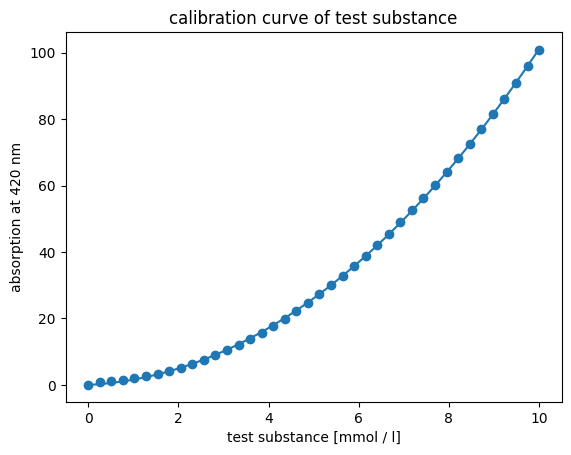

In [64]:
standard = StandardCurve(
    concentrations=concentrations,
    signals=signals,
    conc_unit="mmol / l",
    analyte_name="test substance",
    wavelength=420,
)
print(standard.result_dict)

standard.visualize()